# Degree and Closeness Centrality

## Node Importance

### Network Centrality: identify the most important nodes in a network
influential nodes in a social network

nodes that disseminate information to many nodes or prevent epidemics

important pages on the Web

Nodes that prevent the network from breaking up

### 1. Degree Centraility

- Assumption: important nodes have many connections

- Masurement: number of neighbors

For **Undirected Networks**:

- C_deg(v) = d_v/(N-1), where N is the set of nodes in the network and d_v is the degree of node_v.

if the node v is connected to every other node in the netwrok, C-deg = (N-1) / (N-1) = 1

In [2]:
import networkx as nx

G = nx.karate_club_graph()

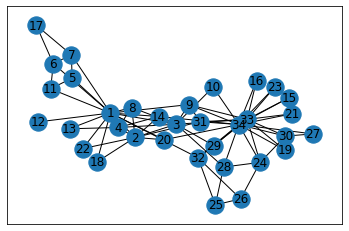

In [9]:
G = nx.convert_node_labels_to_integers(G, first_label=1)
nx.draw_networkx(G)

In [5]:
degCent = nx.degree_centrality(G)
degCent

{1: 0.48484848484848486,
 2: 0.2727272727272727,
 3: 0.30303030303030304,
 4: 0.18181818181818182,
 5: 0.09090909090909091,
 6: 0.12121212121212122,
 7: 0.12121212121212122,
 8: 0.12121212121212122,
 9: 0.15151515151515152,
 10: 0.06060606060606061,
 11: 0.09090909090909091,
 12: 0.030303030303030304,
 13: 0.06060606060606061,
 14: 0.15151515151515152,
 15: 0.06060606060606061,
 16: 0.06060606060606061,
 17: 0.06060606060606061,
 18: 0.06060606060606061,
 19: 0.06060606060606061,
 20: 0.09090909090909091,
 21: 0.06060606060606061,
 22: 0.06060606060606061,
 23: 0.06060606060606061,
 24: 0.15151515151515152,
 25: 0.09090909090909091,
 26: 0.09090909090909091,
 27: 0.06060606060606061,
 28: 0.12121212121212122,
 29: 0.09090909090909091,
 30: 0.12121212121212122,
 31: 0.12121212121212122,
 32: 0.18181818181818182,
 33: 0.36363636363636365,
 34: 0.5151515151515151}

In [6]:
degCent[34]  # 17/33

0.5151515151515151

In [11]:
degCent[33]  # 12/33

0.36363636363636365

For **Directed Networks**:

- C_indeg(v) = d_v_in/(N-1), where N is the set of nodes in the network and d_v_in is the in_degree of node_v.

In [13]:
indegCent = nx.in_degree_centrality(G)

In [ ]:
indegCent['A']  # = 0.143 = 2/14

In [ ]:
indegCent['L']  # = 0.214 = 3/14

For **Directed Networks**:

- C_indeg(v) = d_v_out/(N-1), where N is the set of nodes in the network and d_v_out is the out_degree of node_v.

### 2. Closeness Centrality

- Assumption: important nodes are close to other nodes

- Measurement: C_close_v = (N-1)/sum(d(v, u)), u is all the other nodes in the network, d(v, u) = length of shortest path from v to u

In [14]:
closeCent = nx.closeness_centrality(G)

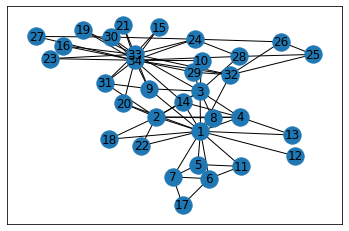

In [16]:
nx.draw_networkx(G)

In [15]:
closeCent[32]

0.5409836065573771

In [17]:
# the calculation process

sum(nx.shortest_path_length(G, 32).values())

61

In [18]:
len(G.nodes()) - 1

33

In [19]:
33/61

0.5409836065573771

### 2.2. Disconnected Nodes

How to measure the closeness centrality of a node when is cannot reach all other nodes?

What is the closeness centrality of node L?

Opetion 1: consider only nodes that L can reach:

C_close_L = R(L)/sum(d(L, u)), where R(L) is the set of nodes L can reach

C_close_L = 1/1 => Problem, the centrality of L is too high. So...


Option 2: Consider only nodes that L can reach and **normalize** by the fraction of nodes L can reach:

C_close_L = (R(L)/(N-1)) * R(L)/sum(d(L, u))

C_close_L = 1/14 * 1/1

In [ ]:
closeCent = nx.closeness_centrality(G, normalized = False)  # can switch normalize to True

### 3. Betweenness Centrality

- Assumption: important nodes connect other nodes

- C_btw(v) = sum(sigma_st(v)/sigma_st), where sigma_st = the number of shortest paths between nodes s and t, sigma_st(v) = the number shortest paths between nodes s and t that pass through node v.

- Endpoints: we can either include or exclude node v as node s and t in the computation

### 3.2 disconnected nodes

- sigma_ad = 0, node D cannot be reached by any other node, making the above definition undefined.

- Normalization: divide centrality values by the number of pairs of nodes in the graphs (excluding v)

1/2 * (N-1) * (N-2) in undirected graphs

(N-1) * (N-2) in directed graphs

In [21]:
btwenCent = nx.betweenness_centrality(G, normalized = True, endpoints = False)
btwenCent

{1: 0.43763528138528146,
 2: 0.053936688311688304,
 3: 0.14365680615680618,
 4: 0.011909271284271283,
 5: 0.0006313131313131313,
 6: 0.02998737373737374,
 7: 0.029987373737373736,
 8: 0.0,
 9: 0.05592682780182781,
 10: 0.0008477633477633478,
 11: 0.0006313131313131313,
 12: 0.0,
 13: 0.0,
 14: 0.04586339586339586,
 15: 0.0,
 16: 0.0,
 17: 0.0,
 18: 0.0,
 19: 0.0,
 20: 0.03247504810004811,
 21: 0.0,
 22: 0.0,
 23: 0.0,
 24: 0.017613636363636363,
 25: 0.0022095959595959595,
 26: 0.0038404882154882154,
 27: 0.0,
 28: 0.02233345358345358,
 29: 0.0017947330447330447,
 30: 0.0029220779220779218,
 31: 0.014411976911976909,
 32: 0.13827561327561325,
 33: 0.145247113997114,
 34: 0.30407497594997596}

In [23]:
import operator
sorted(btwenCent.items(), key = operator.itemgetter(1), reverse = True)[0:5]

[(1, 0.43763528138528146),
 (34, 0.30407497594997596),
 (33, 0.145247113997114),
 (3, 0.14365680615680618),
 (32, 0.13827561327561325)]

*can be very computationally expensive*

=> Approximation

In [25]:
btwnCent_approx = nx.betweenness_centrality(G, normalized = True, endpoints = False, k=10)  

sorted(btwnCent_approx.items(), key = operator.itemgetter(1), reverse = True)[0:5]

[(1, 0.3797402597402597),
 (34, 0.22410113035113036),
 (32, 0.155879329004329),
 (3, 0.12189363876863875),
 (33, 0.10709325396825398)]

### 3.3 Betweenness Centrality - Subsets

put the source nodes group and target nodes group instead of getting all the pairs from all the possible nodes.

In [28]:
btwenCent_subset = nx.betweenness_centrality_subset(
    G, [34,33,21,30,16,27,15,23,10], 
    [1,4,13,11,6,12,17,7], 
    normalized = True)

sorted(btwenCent_subset.items(), key = operator.itemgetter(1), reverse = True)[0:5]

[(1, 0.04899515993265994),
 (34, 0.028807419432419434),
 (3, 0.018368205868205867),
 (33, 0.01664712602212602),
 (9, 0.014519450456950456)]

### 3.4 Betweenness Centrality - Edges; also can do subset

find important edges instaed of nodes

C_btw(e) = sum(sigma_st(e)/sigma_st)

In [30]:
btwnCent_edge = nx.edge_betweenness_centrality(G, normalized=True)

# Basic Page Rank

by google, imporatnce of webpages

PageRank assigns a score of importance to each node. Important nodes are those with many in-links from important pages.

PageRank can be used for any type of network, but it is mainly useful for directed networks.

Steps of Basic PageRank: (k-> infinite, converge)

1. Assign all nodes a pageRank of 1/n

2. perform the basic pagerank update rul k times

**Basic PageRank Update Rule**: each node gives an equal share of its current PageRank to all the nodes it links to. Random walk of k steps: Start on a random node, then choose an outgoing edge at random and follow it to the next node. repeat k times.

# Scaled Page Rank

# Hubs and Authorities

Given a query to a search engine:

- Root: set of highly relevant web pages (pages that contain the query string) - potential authorities.

- Find all pages that link to a page in root - potential hub

- Base: root nodes and any node that links to a node in root.

- Consider all edges connecting nodes in the base set.

## HITS Algorithm

Computing k iterations of the HITS algorithm to assign an authority score and hub score to each node.

1. assign each node an authority and hub score of 1.

2. apply the authority update rule

3. apply the hub update rule

4. Normalize authority and hub scores: auth(j) = auth(j)/sum(auth(i))

5. Repeat k times.

